# Decision Tree

### What are Decision Trees?
Decision trees are a form of machine learning model that can be used for classification and regression problems. These models make decisions based on a series of decision rules learned from the data.

## Structure of a Decision Tree

### Root Node
The starting point of the decision tree.

### Internal Nodes
Intermediate nodes that contain decision conditions.

### Leaves
Terminal nodes that represent final classifications.

### Branches
Connect the nodes, representing the flow of decisions.

## Construction Process

### 1. Data Collection
Explains how to gather training data for the model.

### 2. Data Preprocessing
Deals with cleaning and transforming data into a suitable format.

### 3. Dataset Splitting
Divides the dataset into a training set and a test set.

### 4. Tree Construction
Describes the process of building the decision tree using algorithms such as CART (Classification and Regression Trees) or ID3 (Iterative Dichotomiser 3).

## Features of Decision Trees

### 1. Simplicity
Decision trees are easy to interpret and explain.

### 2. Interpretability
They allow us to understand the reasons behind the decisions made.

### 3. Automatic Feature Handling
The algorithms can automatically handle the most relevant features.

### 4. Noise Resistance
They are capable of handling noisy or error-prone data.



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(42)

# Create a synthetic binary classification dataset
X, y = make_classification(
    n_samples=1000,  # Total number of samples
    n_features=5,    # Number of independent variables (features)
    n_informative=3, # Number of informative features
    n_redundant=2,   # Number of redundant features
    n_clusters_per_class=1, # Number of clusters per class
    random_state=42
)

# Create a pandas DataFrame for easier visualization
columns = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['target'] = y

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the DataFrame
print(df.head())


   feature_0  feature_1  feature_2  feature_3  feature_4  target
0  -1.180985   0.490637   0.039006   1.521781  -1.451989       0
1  -0.768951   0.205962   0.122876   0.617299  -1.034323       0
2  -0.314438   1.575698   0.562548   0.917587   0.209534       1
3  -1.517842   0.626307  -0.146276   2.415246  -1.809693       0
4  -1.983023   0.660931   0.533363   1.243013  -2.663729       1


1. **Import the necessary libraries:**
   - `numpy` for efficient mathematical operations.
   - `pandas` to manipulate and visualize data in a DataFrame.
   - `make_classification` from scikit-learn to generate a synthetic binary classification dataset.
   - `train_test_split` to split the dataset into training and test sets.

2. **Set the seed for reproducibility:**
   - Setting a seed ensures that the random numbers generated are the same on each run.

3. **Create a synthetic dataset:**
   - `make_classification` generates a dataset with a specified number of samples, informative variables, redundant variables, etc.

4. **Create a pandas DataFrame:**
   - Represent the data in a pandas DataFrame for easier visualization.

5. **Display the first few rows of the DataFrame:**
   - Display the first few rows of the DataFrame to examine the dataset.

Now we have a synthetic dataset ready to be used with a decision tree! You can proceed with building the model and the classification process.


# EDA

Exploratory Data Analysis (EDA) is a crucial step to better understand your dataset. You can use various Python libraries to conduct EDA, such as `matplotlib`, `seaborn`, and `pandas`.

   feature_0  feature_1  feature_2  feature_3  feature_4  target
0  -1.180985   0.490637   0.039006   1.521781  -1.451989       0
1  -0.768951   0.205962   0.122876   0.617299  -1.034323       0
2  -0.314438   1.575698   0.562548   0.917587   0.209534       1
3  -1.517842   0.626307  -0.146276   2.415246  -1.809693       0
4  -1.983023   0.660931   0.533363   1.243013  -2.663729       1

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   target     1000 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 43.1 KB
None

Descriptive Statistics:
         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1

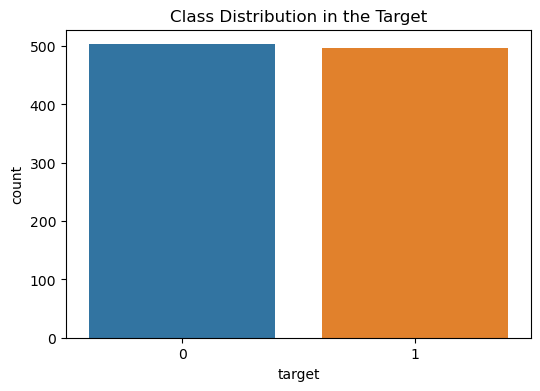

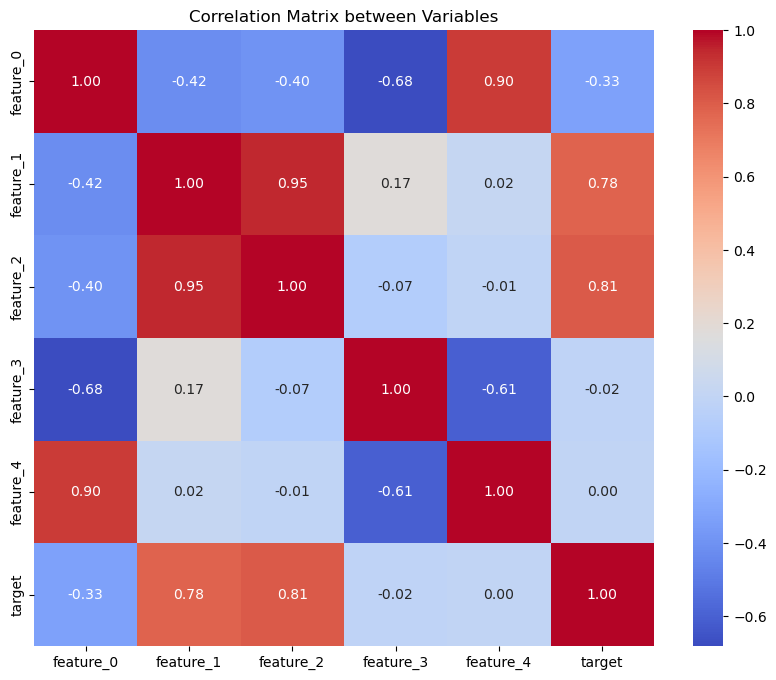

c:\Users\lucap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


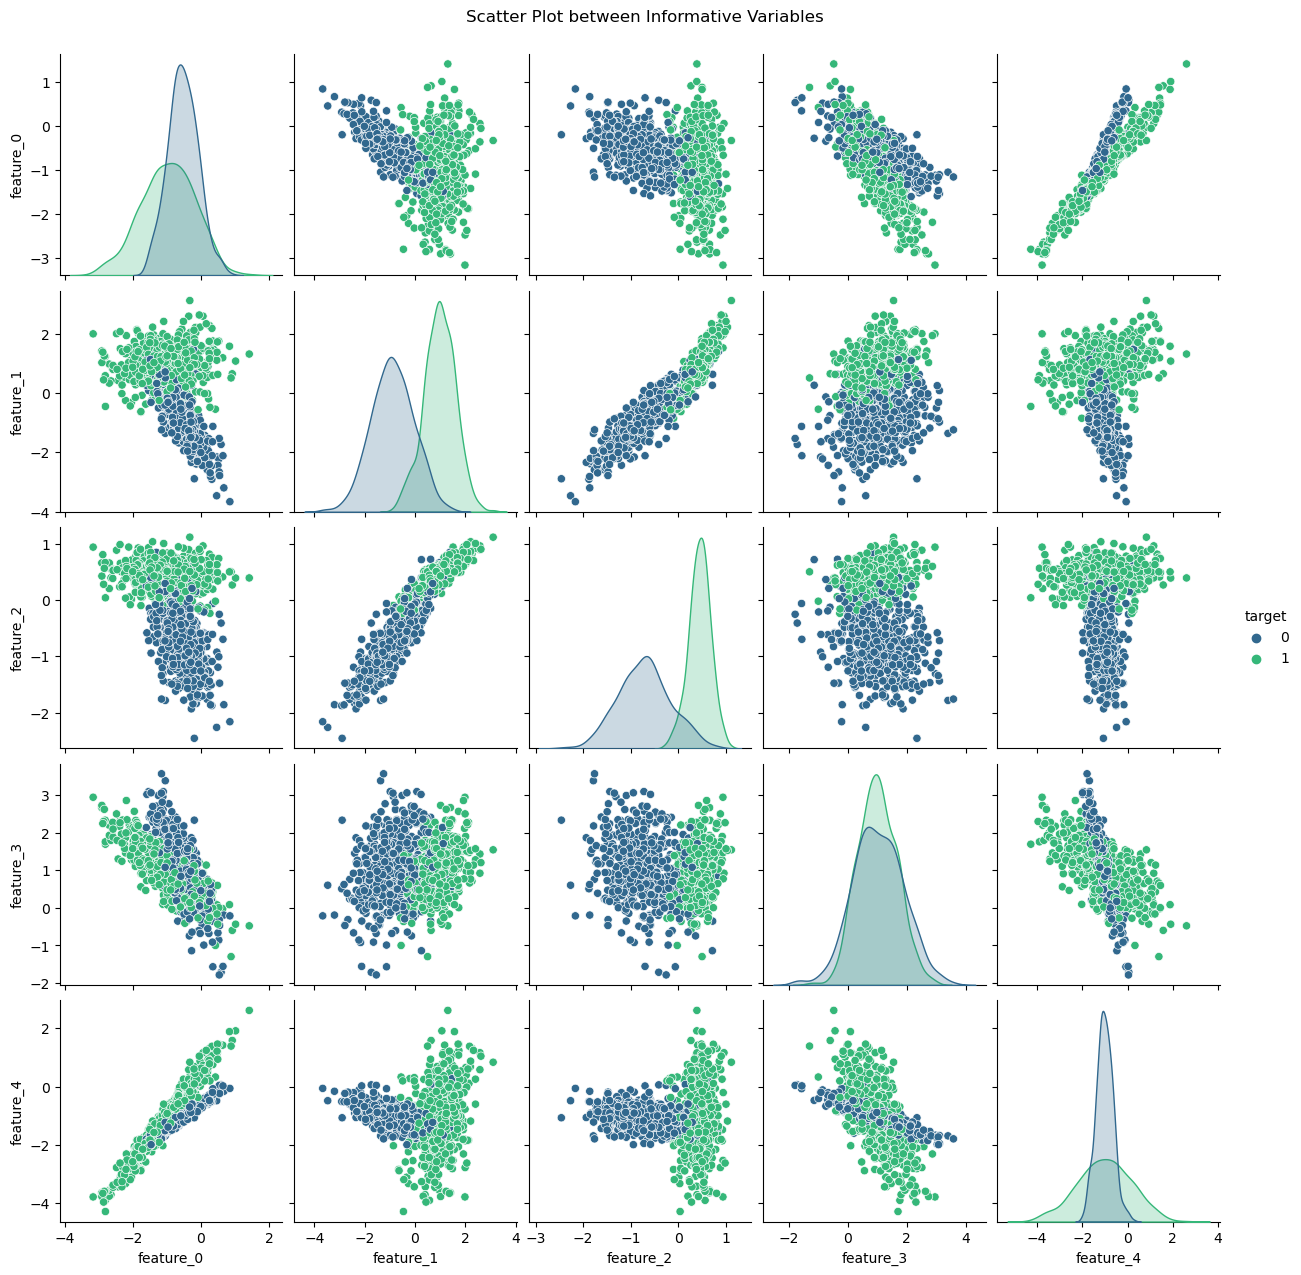

In [2]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

# Display the first few rows of the DataFrame
print(df.head())

# Information about the dataset
print("\nDataset Information:")
print(df.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Distribution of classes in the target
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Class Distribution in the Target')
plt.show()

# Correlation matrix between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Variables')
plt.show()

# Scatter plot between informative variables
sns.pairplot(df, hue='target', palette='viridis')
plt.suptitle('Scatter Plot between Informative Variables', y=1.02)
plt.show()


This code performs several operations:

1. **Display the first few rows of the DataFrame:** Shows the first rows of the DataFrame to get an initial idea of the dataset.

2. **Dataset information:** Provides information on the number of rows, columns, and data types present in the DataFrame.

3. **Descriptive statistics:** Calculates descriptive statistics such as mean, standard deviation, minimum, maximum, etc.

4. **Class distribution in the target:** Visualizes the distribution of classes in the target variable.

5. **Correlation matrix:** Shows the correlation between variables through a heatmap.

6. **Scatter plot between informative variables:** Creates a scatter plot between the informative variables, colored according to the target classes.

These visualizations will help you understand the data distribution and the relationships between variables, preparing you better for building the decision tree model.

# Correlation Matrix

The correlation matrix can give you an indication of the linear relationships between the variables in the dataset. Correlation can range from -1 to 1, where:

- 1 indicates a perfect positive correlation: as one variable increases, the other increases proportionally.
- -1 indicates a perfect negative correlation: as one variable increases, the other decreases proportionally.
- 0 indicates no correlation.

You can use the correlation matrix to identify variables that are correlated with each other, which can influence the choice of the most important variables. However, keep in mind that correlation does not necessarily capture non-linear or complex relationships.

Below, I explain how to interpret the correlation matrix. Let's assume you have already visualized the matrix with the code provided in the exploratory data analysis.

1. **Heatmap colors:**
   - Positive values will be represented by lighter colors, while negative values will be represented by darker colors.

2. **Annotated numerical values:**
   - The elements inside the heatmap show the numerical values of the correlation. Values close to 1 or -1 indicate strong correlation, while values close to 0 indicate weak correlation.

3. **Correlation analysis:**
   - Look at the values on the main diagonal (correlation of each variable with itself), which should be 1.
   - Focus on values close to 1 or -1 outside the main diagonal. These pairs of variables may be correlated.

4. **Correlated variables:**
   - If two informative variables are strongly correlated, you might consider using only one of them to avoid redundancy in the model.

5. **Non-correlated variables:**
   - If the informative variables are not strongly correlated with each other, they may contribute uniquely to the model.

Remember that correlation does not capture all the complexities of relationships between variables. Some variables may still be important even if their correlation is weak or nonexistent. Therefore, it is always advisable to also perform a specific feature selection analysis in addition to using the correlation matrix.

# Train and test set

Splitting the dataset into a training set and a test set is a fundamental step in training and evaluating machine learning models. This practice helps assess the model's effectiveness on unseen data, providing an estimate of its performance on new data.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Code Explanation:

1. **Import the library (already done):**
   - `train_test_split` is a function from scikit-learn that splits the dataset into training and test sets.

2. **Dataset splitting:**
   - `X` is the feature matrix, and `y` is the target vector.
   - `test_size=0.2` indicates that 20% of the data will be used as the test set, while 80% will be used as the training set.
   - `random_state=42` sets the seed for reproducibility, ensuring that the split is the same every time the code is run.

3. **Result:**
   - `X_train` and `y_train` contain the features and target of the training set.
   - `X_test` and `y_test` contain the features and target of the test set.

### Theory Behind Dataset Splitting:

Splitting the dataset into training and test sets is essential for evaluating a model’s performance on unseen data. Here are some key concepts:

1. **Training Set:**
   - Used to train the model, allowing the model to learn the patterns in the data.

2. **Test Set:**
   - Reserved for evaluating the model’s performance on data it hasn’t seen during training.
   - Helps estimate how the model will perform on new data.

3. **Reproducibility:**
   - Setting a `random_state` ensures that the split is the same every time the code is run, making the results reproducible.

4. **Overfitting:**
   - A model might fit too well to the training set, memorizing the data instead of learning general patterns.
   - The test set provides an independent evaluation to check if the model can generalize to new data.

5. **Performance Evaluation:**
   - Measures evaluation metrics like precision, recall, F1-score, etc., using the test set to understand how the model performs on unseen data.

Ensuring that the test set is representative is essential for obtaining reliable performance estimates. Dataset splitting is one of the critical aspects of the machine learning process.

After splitting the dataset into training and test sets, it is important to examine the shape and distribution of data in each set. This will provide you with a detailed view of the size of the sets and the balance of the classes. Below, I show you how to obtain this information using Python and the pandas library.

In [4]:
# Convert NumPy arrays into pandas Series objects
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Information about the shape of the training and test sets
print("Shape of the training set (X_train, y_train):", X_train.shape, y_train_series.shape)
print("Shape of the test set (X_test, y_test):", X_test.shape, y_test_series.shape)

# Class distribution in the training and test sets
print("\nClass distribution in the training set:")
print(y_train_series.value_counts(normalize=True))

print("\nClass distribution in the test set:")
print(y_test_series.value_counts(normalize=True))


Shape of the training set (X_train, y_train): (800, 5) (800,)
Shape of the test set (X_test, y_test): (200, 5) (200,)

Class distribution in the training set:
1    0.5075
0    0.4925
Name: proportion, dtype: float64

Class distribution in the test set:
0    0.545
1    0.455
Name: proportion, dtype: float64


1. **Shape of the Training and Test Sets:**
   - `X_train.shape` returns the dimensions of the feature matrix in the training set.
   - `y_train.shape` returns the size of the target vector in the training set.
   - The same applies to the test set (`X_test.shape` and `y_test.shape`).

2. **Class Distribution:**
   - `y_train_series.value_counts(normalize=True)` returns the class distribution in the target vector of the training set, normalized to get percentages.
   - The same applies to the test set.

### Theory Behind Data Shape and Distribution Analysis:

1. **Data Shape:**
   - The shape of the data reflects the number of samples and the number of features in each set.
   - A larger training set is often beneficial, but it needs to be balanced with the test set.

2. **Class Distribution:**
   - A balanced class distribution is desirable to avoid bias in model training.
   - If one class is overrepresented or underrepresented, the model may struggle to generalize well for that class.

3. **Considerations:**
   - Ensure that the class distribution in the test set reflects that of the training set to avoid skewed results.

This code provides useful insights into the shape and class distribution of the training and test sets, which will help in the next phase of model building and evaluation.

# Application of Decision Tree

In [6]:
# Import the decision tree module from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Create an instance of the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Display the classification report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

Model accuracy: 0.94

Confusion Matrix:
[[100   9]
 [  4  87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       109
           1       0.91      0.96      0.93        91

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



Feature Names: Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4'], dtype='object')
Class Names: [0 1]


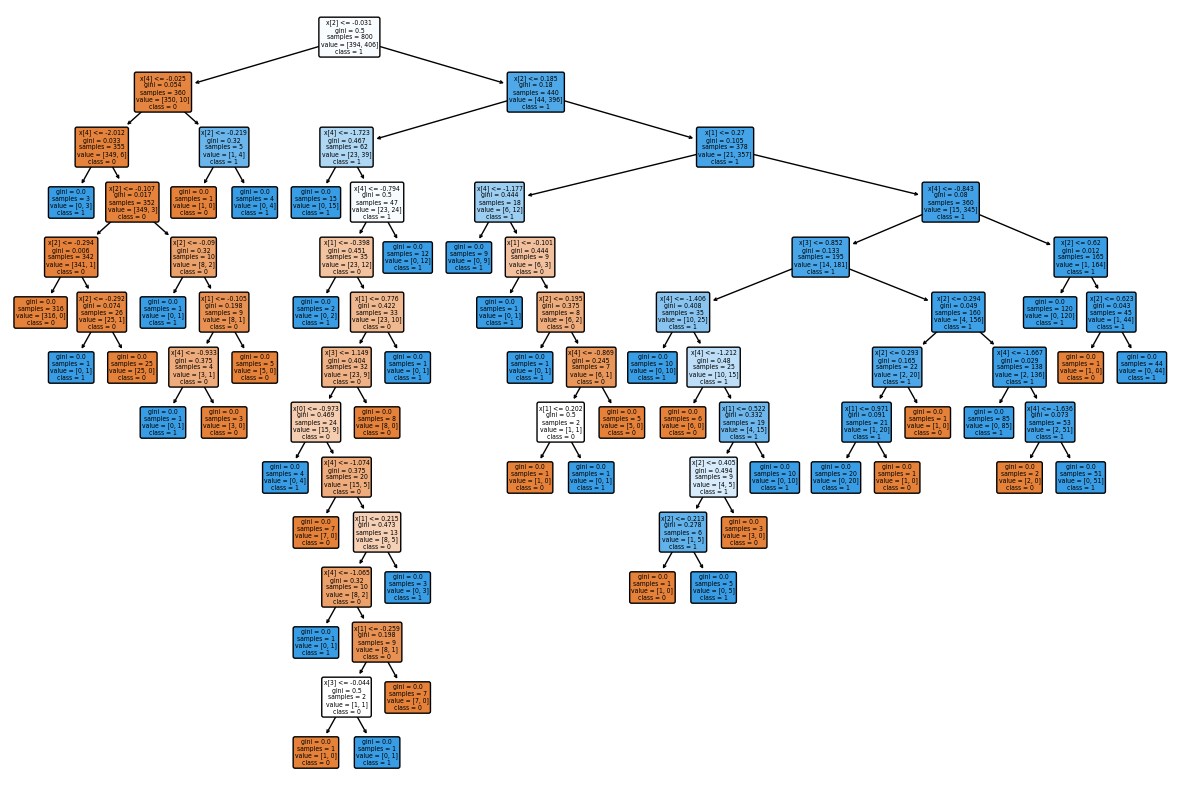

In [11]:
print("Feature Names:", df.columns[:-1])

print("Class Names:", np.unique(y_train))

# Visualizza l'albero decisionale
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_model, class_names=[str(c) for c in np.unique(y_train)], filled=True, rounded=True)
plt.show()

1. **Import the Necessary Modules:**
   - `DecisionTreeClassifier` is the decision tree model from scikit-learn.
   - `accuracy_score`, `classification_report`, and `confusion_matrix` are used to evaluate the model's performance.
   - `tree` and `matplotlib.pyplot` are used to visualize the decision tree.

2. **Create a Decision Tree Model:**
   - `DecisionTreeClassifier(random_state=42)` creates an instance of the model with the seed set for reproducibility.

3. **Train the Model:**
   - `tree_model.fit(X_train, y_train)` trains the model on the training set.

4. **Make Predictions:**
   - `tree_model.predict(X_test)` makes predictions on the test set.

5. **Evaluate the Model's Performance:**
   - `accuracy_score` calculates the model's accuracy.
   - `confusion_matrix` returns the confusion matrix.
   - `classification_report` provides a detailed report of precision, recall, and F1-score.

6. **Visualize the Decision Tree:**
   - `tree.plot_tree` visualizes the decision tree.

### Theory Behind the Decision Tree:

- **The Decision Tree:**
  - A decision tree consists of decision nodes (conditions) and leaves (classifications).
  - Each node represents a condition on a feature, and each leaf represents an output class.
  - The model makes decisions based on these conditions to classify new data.

- **Training the Decision Tree:**
  - During training, the decision tree automatically learns the optimal conditions to split the data into classes.
  - It can recursively split the features to maximize node purity.

- **Model Evaluation:**
  - Accuracy, the confusion matrix, and the classification report provide an evaluation of the model's performance.
  - Visualizing the decision tree can help interpret the decisions made by the model.

Quality metrics are essential for evaluating the performance of a classification model.

In [12]:
# Calcola e stampa le metriche di qualità del modello
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')

Precision: 0.91
Recall: 0.96
F1 Score: 0.93


1. **Precision:**
   - Precision measures the percentage of positive instances predicted by the model that are actually positive.
   - Formula: `precision = TP / (TP + FP)`, where TP is the number of True Positives and FP is the number of False Positives.

2. **Recall (Sensitivity):**
   - Recall measures the percentage of actual positive instances that were correctly predicted by the model.
   - Formula: `recall = TP / (TP + FN)`, where TP is the number of True Positives and FN is the number of False Negatives.

3. **F1 Score:**
   - The F1 Score is the harmonic mean of precision and recall, providing a single metric that accounts for both.
   - Formula: `F1 Score = 2 * (precision * recall) / (precision + recall)`.

**Interpretation:**
- High precision indicates that when the model predicts a positive class, it is very likely to be correct.
- High recall indicates that the model is able to identify most of the actual positive instances.
- The F1 Score is particularly useful when precision and recall need to be balanced.

Keep in mind that the metrics can vary depending on the context and specific goals of the classification problem. For example, in a medical context, it might be more critical to have high recall to ensure the detection of all positive cases.

Using these metrics will help you gain a deeper understanding of your model's performance and make informed decisions about its effectiveness in solving the classification problem.

# Rendiamo l'albero più leggibile

**Pruning**, also known as "trimming," is a technique used in decision tree training to reduce their complexity and improve generalization to new data. The goal of pruning is to avoid overfitting, a phenomenon where the tree fits the training set too well, memorizing noise or peculiarities in the data instead of learning general patterns.

Pruning can be performed in two main ways:

1. **Pre-pruning (Early Stopping):**
   - During the training of the tree, conditions are imposed to stop the splitting process before the tree becomes too complex.
   - For example, you can limit the maximum depth of the tree or set a minimum number of samples required to make a split.

2. **Post-pruning (Pruning after Training):**
   - The tree is fully trained, and afterward, some of its parts, such as nodes or branches, are removed or replaced based on optimization criteria.
   - For example, cost-complexity pruning can be used to decide which branches to remove, reducing the depth of the tree.

Accuracy of the pruned model: 0.92


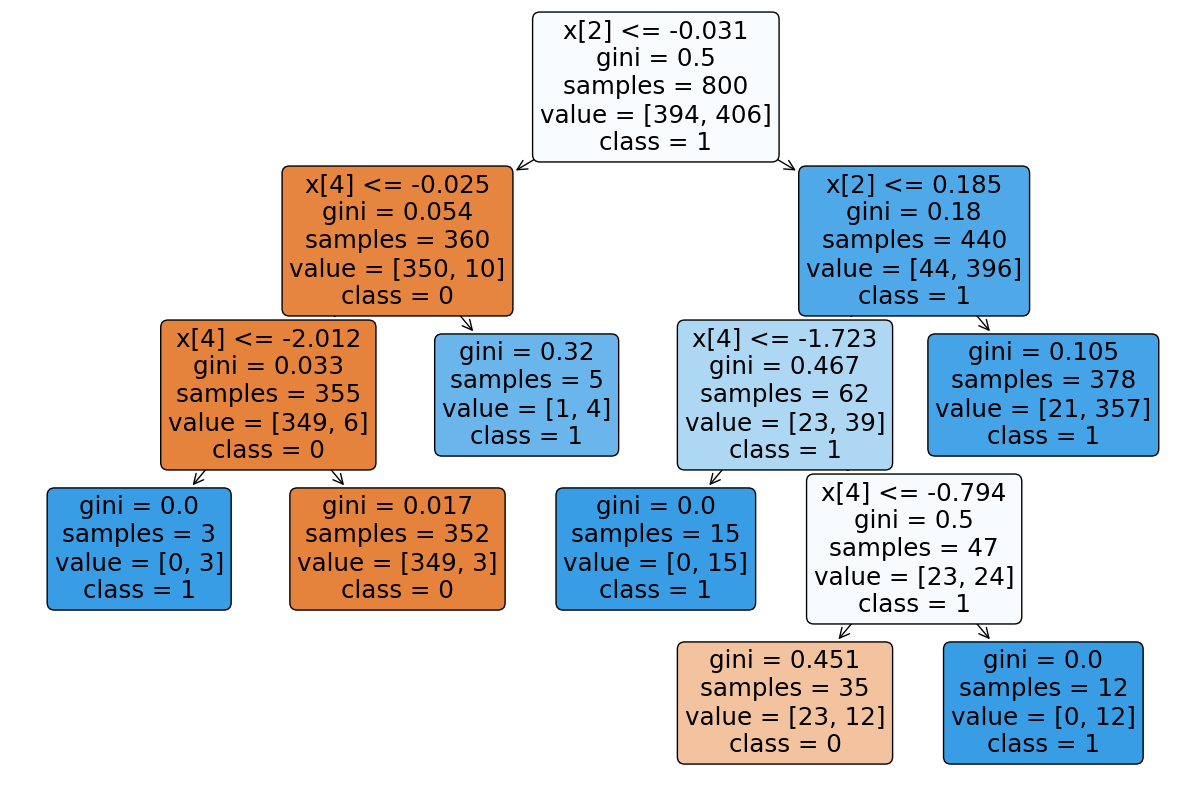

In [14]:
# Import the necessary module for pruning
from sklearn.tree import plot_tree

# Create a decision tree model with post-pruning
pruned_tree_model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.005)
pruned_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pruned_pred = pruned_tree_model.predict(X_test)

# Evaluate the pruned model's performance
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
print(f'Accuracy of the pruned model: {pruned_accuracy:.2f}')

# Visualize the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_tree_model, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

1. **Create a Decision Tree Model with Pruning:**
   - `DecisionTreeClassifier(ccp_alpha=0.005)` creates a decision tree model with post-pruning.
   - `ccp_alpha` is the parameter that controls the cost-complexity pruning. A higher value of `ccp_alpha` results in more aggressive pruning.

2. **Train the Pruned Model:**
   - `pruned_tree_model.fit(X_train, y_train)` trains the pruned model on the training set.

3. **Make Predictions:**
   - `pruned_tree_model.predict(X_test)` makes predictions on the test set.

4. **Evaluate the Pruned Model's Performance:**
   - `accuracy_score` calculates the accuracy of the pruned model.

5. **Visualize the Pruned Decision Tree:**
   - `plot_tree` visualizes the pruned decision tree.

### Pruning Theory and Benefits:

- **Complexity Reduction:**
  - Pruning reduces the complexity of the decision tree, improving its generalization to new data.

- **Prevention of Overfitting:**
  - It prevents the tree from memorizing noise or peculiarities in the training set.

- **Improved Readability:**
  - A pruned tree is simpler and more readable, making it easier to interpret its decisions.

- **Control Over Complexity:**
  - The `ccp_alpha` parameter controls the trade-off between accuracy on the training set and the ability to generalize to new data.

By using pruning, you can achieve a more robust and interpretable model while maintaining good predictive performance.



In [15]:
# Compute the confusion matrix for the pruned model
pruned_conf_matrix = confusion_matrix(y_test, y_pruned_pred)
print('\nConfusion Matrix (Pruned Model):')
print(pruned_conf_matrix)

# Compute and print quality metrics for the pruned model
pruned_precision = pruned_conf_matrix[1, 1] / (pruned_conf_matrix[1, 1] + pruned_conf_matrix[0, 1])
pruned_recall = pruned_conf_matrix[1, 1] / (pruned_conf_matrix[1, 1] + pruned_conf_matrix[1, 0])
pruned_f1_score = 2 * (pruned_precision * pruned_recall) / (pruned_precision + pruned_recall)

print(f'\nPrecision (Pruned Model): {pruned_precision:.2f}')
print(f'Recall (Pruned Model): {pruned_recall:.2f}')
print(f'F1 Score (Pruned Model): {pruned_f1_score:.2f}')



Confusion Matrix (Pruned Model):
[[96 13]
 [ 3 88]]

Precision (Pruned Model): 0.87
Recall (Pruned Model): 0.97
F1 Score (Pruned Model): 0.92


# Feature Importance
To identify the most important variables in a decision tree model, we can use the `feature_importances_` attribute provided by scikit-learn. This attribute returns an array representing the importance of each feature in the model.

Feature Importance in the Decision Tree Model:
     Feature  Importance
2  feature_2    0.818448
4  feature_4    0.116843
1  feature_1    0.038849
3  feature_3    0.016483
0  feature_0    0.009377


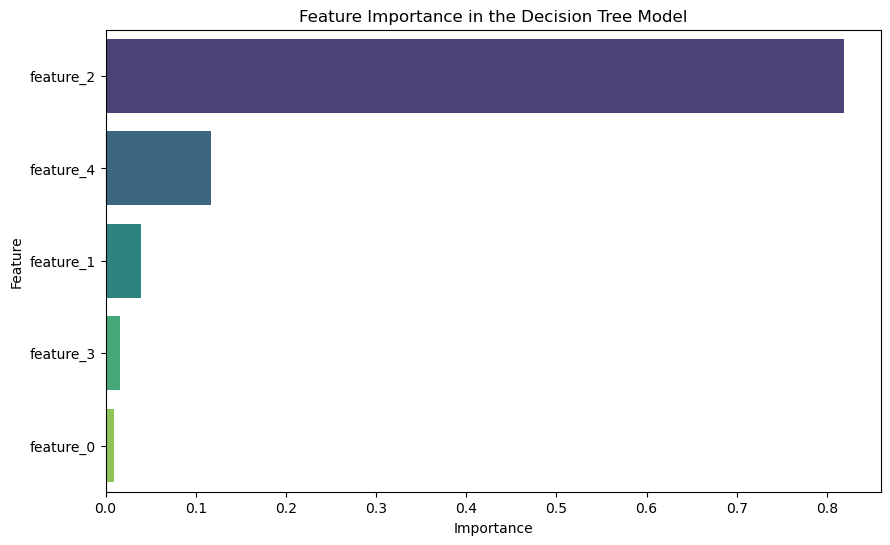

In [16]:
# Get the feature importance from the unpruned decision tree model
feature_importances = tree_model.feature_importances_

# Create a DataFrame to visualize the feature importance
importance_df = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance in the Decision Tree Model:")
print(importance_df)

# Visualize a bar plot of the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in the Decision Tree Model')
plt.show()


1. **Obtain Feature Importance from the Decision Tree Model:**
   - `tree_model.feature_importances_` returns an array with the importance of the features.

2. **Create a DataFrame to Visualize Feature Importance:**
   - A DataFrame is created to organize and display the feature importance values.

3. **Print Feature Importance:**
   - The DataFrame is printed to show the variables ordered by importance.

4. **Visualize a Bar Plot of Feature Importance:**
   - A bar plot is used to clearly visualize the relative importance of the features.

### Theory Behind Feature Importance:

- **Feature Importance:**
   - Feature importance measures how much each feature contributes to reducing impurity or classification error in the decision tree.

- **Usefulness of Feature Importance Analysis:**
   - Identifying the most important features is useful for understanding which characteristics are crucial for the model's decisions.

- **Feature Selection:**
   - It can be used as a tool for feature selection, focusing on the most informative variables.

- **Model Interpretation:**
   - Helps interpret and explain the model to stakeholders.

- **Caution About Over-Importance:**
   - Some features may appear more important than others, even if their actual relevance is limited. It's important to interpret feature importance in the context of the problem.

The bar plot and table will clearly show the most important variables in your decision tree model. Consider this information when analyzing and interpreting the behavior of your model in relation to the available features.

# Smarter Data Handling (Cross Validation)

Cross-validation is a fundamental technique in model analysis that allows for more robust performance estimates, reducing the risk of biased evaluations due to a particular data split. Specifically, cross-validation divides the dataset into several portions, training and evaluating the model on different combinations of training and test sets. One of the most common methods is k-fold cross-validation, where the dataset is divided into k parts (folds), and the model is trained and evaluated k times, each time using a different part as the test set.

In [17]:
from sklearn.model_selection import cross_val_score

# Create a decision tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation with k=5
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
print("Accuracy Scores for each fold:", cv_scores)

# Print the mean accuracy score
print("Mean Accuracy of Cross-Validation:", cv_scores.mean())


Accuracy Scores for each fold: [0.95625 0.8875  0.95    0.96875 0.94375]
Mean Accuracy of Cross-Validation: 0.9412499999999999


1. **Creation of the Decision Tree Model:**
   - An instance of the decision tree model is created.

2. **Execution of k-fold Cross-Validation:**
   - `cross_val_score` performs k-fold cross-validation.
   - `X_train` and `y_train` are the training set.
   - `cv=5` specifies that the cross-validation will be performed with 5 folds.
   - `scoring='accuracy'` indicates that accuracy is the metric used during cross-validation.

3. **Printing the Results:**
   - The accuracy scores obtained in each fold are printed.
   - The mean of the scores provides an overall estimate of the model's performance based on different splits of the training set.

### Theory of Cross-Validation:

- **Advantages of Cross-Validation:**
   - Reduces dependency on a particular data split, providing more reliable estimates of the model's performance.

- **k-fold Cross-Validation:**
   - Splits the dataset into k folds, training and evaluating the model k times, using each fold as the test set exactly once.

- **Model Performance Estimates:**
   - Provides a more robust estimate of model performance compared to a single train/test split.

- **Parameter Selection:**
   - Often used with grid search (`GridSearchCV`) to select optimal parameters.

By using cross-validation, you can obtain more reliable performance estimates of your model, identify performance variability across different data partitions, and improve your understanding of the model's behavior.

# Hyperparameters

Hyperparameters are parameters that are not learned directly by the model during the training process but must be set before training the model. Examples include the maximum depth of a decision tree, regularization in a logistic regression model, or the number of neighbors in a k-Nearest Neighbors (KNN) model. Hyperparameter optimization is the process of searching for the best values for these parameters to achieve the best model performance.

Grid Search is a technique used to search through a "grid" of possible combinations of hyperparameter values, evaluating the model's performance for each combination using cross-validation techniques. For example, you could search for different values of the maximum depth of a decision tree and different values for the splitting criterion, examining all possible combinations of these parameters.

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to explore
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object with the model and the hyperparameter grid
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training set
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Print the accuracy obtained with the best hyperparameters
best_accuracy = grid_search.best_score_
print(f"\nAccuracy with Best Hyperparameters: {best_accuracy:.2f}")

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Accuracy with Best Hyperparameters: 0.94


1. **Definition of the Hyperparameter Grid:**
   - `param_grid` defines the grid of hyperparameters to explore. In this example, we are searching through different splitting criteria, maximum depths, and minimum thresholds for splits and leaves.

2. **Creation of the Decision Tree Model:**
   - `tree_model = DecisionTreeClassifier(random_state=42)` creates a decision tree model.

3. **Creation of the GridSearchCV Object:**
   - `GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')` creates a grid search object with the model and the hyperparameter grid. `cv=5` specifies 5-fold cross-validation, and `scoring='accuracy'` indicates that accuracy is the metric to optimize.

4. **Execution of the Grid Search:**
   - `grid_search.fit(X_train, y_train)` runs the grid search on the training set.

5. **Print the Best Hyperparameters and Accuracy:**
   - `grid_search.best_params_` returns the best hyperparameters found.
   - `grid_search.best_score_` returns the accuracy achieved with the best hyperparameters.

### Theory of Grid Search and Hyperparameter Optimization:

- **Choosing the Hyperparameter Grid:**
   - The hyperparameter grid should be chosen carefully. You can define the values to explore based on your knowledge of the problem or experiment with a broader range.

- **Trade-off Between Complexity and Performance:**
   - Some hyperparameters, such as maximum depth, can affect the complexity of the model. Optimization seeks the best trade-off between complexity and model performance.

- **Computational Resources:**
   - A larger grid may require more computational resources. You can adjust the grid based on available resources and your need for optimization.

- **Evaluating on a Separate Test Set:**
   - After the grid search, it is advisable to evaluate the optimized model on a separate test set to obtain an unbiased estimate of its performance.



# Decision Tree Hyperparameters
Decision trees are machine learning models that can be configured through various hyperparameters to adjust their behavior during the training process. Here's an explanation of the main hyperparameters of a decision tree:

1. **`max_depth` (Maximum Depth):**
   - The maximum depth of the decision tree, i.e., the maximum number of levels from root to leaves. Setting this too high can lead to overfitting, while too low can lead to underfitting.

2. **`min_samples_split` (Minimum Samples to Split a Node):**
   - The minimum number of samples required in a node before it is split further. Setting this too low can lead to overfitting, while too high can lead to underfitting.

3. **`min_samples_leaf` (Minimum Samples in a Leaf):**
   - The minimum number of samples required in a leaf. Setting this too low can lead to overfitting, while too high can lead to underfitting.

4. **`criterion` (Splitting Criterion):**
   - The criterion used to measure the quality of a split. It can be set to "gini" (Gini index) or "entropy" (entropy). Both Gini index and entropy measure the purity of a split in terms of class distribution.

5. **`ccp_alpha` (Cost-Complexity Pruning Path):**
   - Used in post-pruning to set the complexity-penalty parameter. A higher value of `ccp_alpha` leads to more aggressive pruning, reducing the tree's depth.

6. **`max_features` (Maximum Number of Features to Consider for a Split):**
   - The maximum number of features to consider when searching for the best split at each node. It can be an integer (e.g., 5) or a fraction of the total features (e.g., "sqrt" for the square root of the total number of features).

7. **`max_leaf_nodes` (Maximum Number of Leaves):**
   - The maximum number of leaves in the tree. If set, the tree will be pruned once it reaches the maximum number of leaves.

These hyperparameters influence the complexity of the decision tree and its ability to fit the data. It is important to experiment with different combinations of hyperparameters using techniques like grid search to find the optimal configuration that maximizes model performance. The choice of hyperparameters can vary depending on the specific problem and dataset.